# Notebook Setup
Installs necessary requirements and configures proper notebook behavior  
Note: The notebook assumes you are using the base conda environment

In [9]:
%load_ext autoreload
%autoreload 2
    
print("Notebook setup has completed")

Notebook setup has completed


# Load Data
Load the data from the csv file into a pandas dataframe

In [5]:
CDS_AND_VINYL_JSON_PARAMS = {
    'file': 'reviews_CDs_and_Vinyl_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
CELL_PHONE_JSON_PARAMS = {
    'file': 'reviews_Cell_Phones_and_Accessories_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
CLOTHING_JSON_PARAMS = {
    'file': 'reviews_Clothing_Shoes_and_Jewelry_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
ELECTRONICS_JSON_PARAMS = {
    'file': 'reviews_Electronics_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
HOME_AND_KITCHEN_JSON_PARAMS = {
    'file': 'reviews_Home_and_Kitchen_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
KINDLE_STORE_JSON_PARAMS = {
    'file': 'reviews_Kindle_Store_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
MOVIES_JSON_PARAMS = {
    'file': 'reviews_Movies_and_TV_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}
SPORTS_JSON_PARAMS = {
    'file': 'reviews_Sports_and_Outdoors_5.json',
    'filetype': 'json',
    'features': "reviewText",
    'labels': "overall",
}


In [7]:
# Please add the above files you have in your data directory
files = [ELECTRONICS_JSON_PARAMS, CDS_AND_VINYL_JSON_PARAMS, CELL_PHONE_JSON_PARAMS]

In [11]:
from preprocessing import get_dataframe_file
frames = []
for file in files:
    frame = get_dataframe_file(params = file, points=50_000, equalize=True)
    frames.append(frame)
# df = df.dropna()

FileNotFoundError: File C:\Users\matth\Documents\Homework\COMP5630\ML-Project\data\reviews_Electronics_5.json does not exist

In [4]:
len(df)

124949

# Preprocess Data
Split into training, testing, and validation sets, and vectorize the data

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from preprocessing import get_subsets

word_vectorizer = CountVectorizer(
    min_df=0.0001, 
    max_df=0.7
 )
X = df["reviewText"].to_numpy()
X = word_vectorizer.fit_transform(X)
y = df['overall'].to_numpy()

X_train, X_val, X_test, y_train, y_val, y_test = get_subsets(X,y, train_split=0.8, val_split=0.1, test_split=0.1)


# Visualize Data Distribution

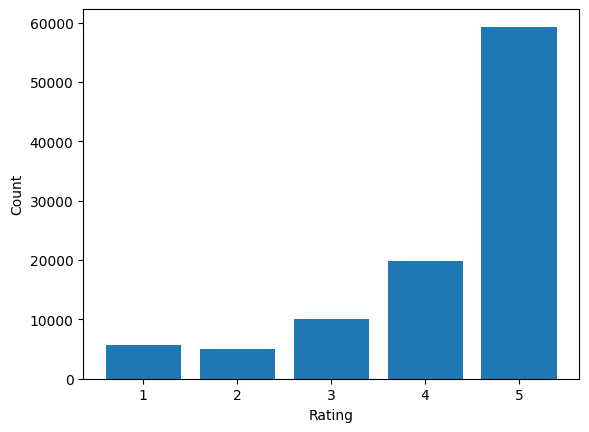

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.unique(y_train, return_counts=True)[0], np.unique(y_train, return_counts=True)[1])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [16]:
print("Data and shapes:")
print("X_train:", type(X_train), "of shape", X_train.shape)
print("Y_train:", type(y_train), "of shape", y_train.shape)

Data and shapes:
X_train: <class 'scipy.sparse._csr.csr_matrix'> of shape (99959, 20387)
Y_train: <class 'numpy.ndarray'> of shape (99959,)


# Training the Model

  0%|          | 0/500 [00:00<?, ?it/s]c:\Users\matth\Documents\Homework\COMP5630\ML-Project\mlp.py:12: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-X))
c:\Users\matth\Documents\Homework\COMP5630\ML-Project\mlp.py:15: RuntimeWarning: overflow encountered in exp
  a = 1.0 / (1.0 + np.exp(-X))
100%|██████████| 500/500 [00:57<00:00,  8.64it/s]


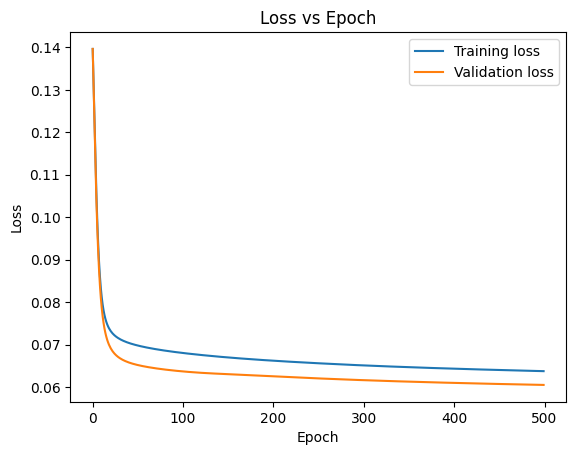

In [56]:
from mlp import MultiLayerPerceptron
clf = MultiLayerPerceptron(
    epochs=500,
    lr=0.1,
    hidden_layers=[50, 20],
    activation="sigmoid",
)
clf.fit(X_train, y_train, X_val, y_val, batch_size=200)
clf.plot_loss()

In [57]:
print(f"Training accuracy: {clf.score(X_train, y_train)}")
print(f"Testing accuracy: {clf.score(X_test, y_test)}")

Training accuracy: 0.525
Testing accuracy: 0.53


In [60]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         9
           3       0.20      0.11      0.14         9
           4       0.00      0.00      0.00        23
           5       0.58      0.93      0.72        56

    accuracy                           0.53       100
   macro avg       0.16      0.21      0.17       100
weighted avg       0.35      0.53      0.41       100



c:\Users\matth\Documents\Homework\COMP5630\ML-Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\Documents\Homework\COMP5630\ML-Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\Documents\Homework\COMP5630\ML-Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Benchmarking

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    activation="logistic",
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
)
clf.fit(X_train, y_train)

c:\Users\matth\Documents\Homework\COMP5630\ML-Project\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50, 20), max_iter=500)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=50,
)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

In [20]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(f"Training accuracy: {clf.score(X_train, y_train)}")
print(f"Testing accuracy: {clf.score(X_test, y_test)}")
report = classification_report(y_test, pred)
print(report)

Training accuracy: 0.7097509979091428
Testing accuracy: 0.6737895158063225
              precision    recall  f1-score   support

           1       0.53      0.51      0.52       699
           2       0.40      0.00      0.01       570
           3       0.44      0.41      0.43      1310
           4       0.46      0.28      0.35      2456
           5       0.75      0.92      0.83      7460

    accuracy                           0.67     12495
   macro avg       0.52      0.42      0.43     12495
weighted avg       0.63      0.67      0.63     12495



In [18]:

p = clf.predict_proba(X_test)
p = p @ np.array([-1,1]).reshape(2,1)
print(f"Most positive example is {np.argmax(p)}")
print(f"Most negative example is {np.argmin(p)}")
print(f"Most neutral example is {np.argmin(np.abs(p))}")

p = (p*0.5 + 0.5)
incorrect_amount = p - y_test.reshape(-1,1)
print(f'Most incorrect example is {np.argmax(np.abs(incorrect_amount))}')


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 5)

In [165]:
example = 6197
print(f"Predicted: {best_clf.predict(X_test[example])[0]} {p[example]}\nActual: {y_test[example]}")
print(word_vectorizer.inverse_transform(X_test[example])[0])


Predicted: 1 [1.]
Actual: 1
['one' 'has' 'just' 'you' 'be' 'are' 'right' 'as' 'what' 'with' 'br'
 'violence' 'which' 'from' 'go' 'not' 'or' 'no' 'on' 'city' 'an' 'where'
 'all' 'have' 'so' 'more' 'far' 'fact' 'audiences' 'around' 'ever' 'who'
 'out' 'get' 'well' 'middle' 'into' 'experience' 'if' 'can' 'side'
 'one of' 'of the' 'this is' 'br br' 'br the' 'from the' 'in the' 'it is'
 'as that' 'that is' 'is the' 'to the' 'all the' 'on the' 'more so'
 'that it' 'out for' 'and get' 'with it' 'what is' 'you can' 'very' 'time'
 'sense' 'realism' 'only' 'he' 'down' 'pat' 'see' 'by' 'written' 'his'
 'life' 'things' 'rather' 'than' 'sets' 'done' 'sense of' 'of realism'
 'not only' 'by the' 'but it' 'written and' 'rather than' 'and the' 'way'
 'dialogue' 'characters' 'even' 'serial' 'killer' 'while' 'some' 'style'
 'us' 'most' 'at' 'years' 'been' 'she' 'her' 'young' 'woman' 'interesting'
 'the dialogue' 'dialogue is' 'the characters' 'characters are'
 'serial killer' 'of us' 'the most' 'in this'

## Runs
1. 89.98: (10,5), Logisitic, Early Stopping
2. 89.95: (10,5), Relu, Early Stopping,
3. 89.71: (5), Relu, Early Stopping
4. 85.12: (5), Relu, 
5. 91.11: (5), Relu, Early Stopping, 2-Grams

# Training

In [ ]:
from sympy import Lambda, Symbol
from training import matrix_train


x = Symbol("x")


# each axis must be an iterable. if you want to use a constant, wrap it in an iterable of len 1
hyperparameter_matrix = {
    "epochs": np.logspace(np.log10(100), np.log10(100000), num=20, dtype="int64"),
    "lr": np.logspace(np.log10(.00001), np.log10(.1), num=20),
    "hidden_layers": [5, 6, 7],
    "neurons_per_layer": [3],
    "activation": [Lambda(x, x**2)],
}

best_params = matrix_train(hyperparameter_matrix, MultiLayerPerceptron, X_train, y_train, X_test, y_test)

print(best_params)
# mlp = MultiLayerPerceptron(**best_params)


# Performance

In [ ]:
from analysis import accuracy, confusion, report


mlp = MultiLayerPerceptron(**best_params)
mlp.fit(X_train, y_train)

# print(accuracy(mlp.predict(X_test), y_test))
# print(confusion(mlp.predict(X_test), y_test))
print(report(mlp.predict(X_test), y_test))


# Benchmarking

In [ ]:
# TODO utilize other classifiers and compare performance